## Showing satellite density sky maps


We perform this test for SKA-Low with the population of starlink as of March 2025, and an effective beam that includes the first side lobe.


### 1. Imports
We start by importing standard libraries and the needed functions from `analytical_satsky`

In [1]:
import numpy as np
import pandas as pd
import astropy.units as u

from analytical_satsky.model import compute_total_satellite_density
from analytical_satsky.plot_utils import plot_sky_map

import warnings
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)
from matplotlib.colors import LogNorm
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 2. Shells

We then load the shells of interest.

In [2]:
from analytical_satsky.loaders import load_table_starlink_march25

shells_df = load_table_starlink_march25()
print(shells_df)

           i           h     n
0  43.002045  502.730350  2575
1  53.151458  350.573937   439
2  53.151458  466.106828  1021
3  53.151458  542.588082  2383
4  70.000195  552.705926   432
5  97.655455  557.949260   231


### 3. Calculate satellite density on a grid

In [3]:
ndec, nra = 90*10, 360*5
target_dec = np.linspace(-np.pi/2, np.pi/2, ndec, endpoint=False)*u.radian
target_ra = np.linspace(0, 2*np.pi, nra, endpoint=False)*u.radian
skamid_lat = (-30.71292499*u.deg).to(u.rad)
skamid_lon = (116.67081524*u.deg).to(u.rad)
Lfov = 17.8*u.deg
texp = 3600*u.s

total_dens = compute_total_satellite_density(skamid_lat, skamid_lon, shells_df, target_dec, target_ra, Lfov, texp)

### 4. Plot 

We can finally make a polar plot of the satellite density.

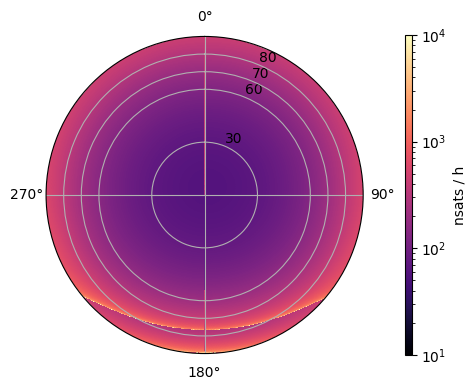

In [4]:
plot_sky_map(total_dens, skamid_lat, skamid_lon, target_ra, target_dec)